In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import HuberRegressor
from scipy import optimize

In [2]:
df= pd.read_csv("55_1885.csv")
df.head()
df[['checkout_price', 'base_price']]/=100

In [3]:
def test_func(x, a, b, c):
    return (a*np.sin(b*x)+c)
params, params_covariance= optimize.curve_fit(test_func, df.week, df.num_orders, p0=[100, 2, 200] )
df['sin']= test_func(df.week, params[0], params[1], params[2] )

In [4]:
df.drop(columns=['week','meal_id', 'category', 'cuisine', 'city_code', 'center_type_TYPE_B','center_type_TYPE_C'], inplace=True)
df.head(10)
#df['checkout_price'], df['base_price']= df['checkout_price']/200, df['base_price']/200


,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,diff,sin
0,1.3683,1.5229,0,0,177,2.0,15.46,208.168679
1,1.3583,1.5229,0,0,323,2.0,16.46,247.768407
2,1.3292,1.3392,0,0,96,2.0,1.00,239.293987
3,1.3586,1.3486,0,0,163,2.0,-1.00,206.277262
4,1.4650,1.4750,0,0,215,2.0,1.00,240.399363
5,1.4653,1.4653,0,0,285,2.0,0.00,246.909741
6,1.4553,1.4653,0,0,148,2.0,1.00,207.730322
7,1.4653,1.4553,0,0,135,2.0,-1.00,231.654859
8,1.3483,1.3483,0,0,175,2.0,0.00,252.249488
9,1.4456,1.4356,0,0,175,2.0,-1.00,212.326863


In [5]:
Y= df.loc[:,'num_orders'].values
X= df.drop(columns=['num_orders']).loc[:,'checkout_price':].values
X.reshape(145,7)
Y.reshape(145)

array([177, 323,  96, 163, 215, 285, 148, 135, 175, 175, 244, 190,  68,
       135, 366,  67, 270, 350, 244, 188, 136, 296, 188, 161,  55, 176,
       202, 296, 107, 135, 203, 123, 215, 231, 284, 161, 188, 175, 270,
       298, 323, 351, 378, 419, 256, 460, 350, 366, 433, 513, 284, 406,
       500, 404, 419, 323, 782, 284, 203, 271, 432, 108, 432, 231, 298,
       391, 420, 188, 391, 485, 351, 377, 175, 379, 404, 269, 257, 230,
       284, 271, 163, 148, 242, 216, 231, 204, 256, 377, 258, 271, 244,
       231, 176, 107, 257, 271, 203, 134, 109, 163, 242, 203, 406, 244,
       229, 230, 283, 149, 244, 161, 135,  68, 243, 148,  55,  69, 162,
       176, 123, 148,  94, 123, 217, 296, 109,  94, 231,  40,  94,  95,
       162, 162, 122,  82, 216, 134,  96,  81,  67, 204, 107, 121, 176,
       162, 121], dtype=int64)

In [6]:
g = {'colsample_bytree': 0.4,
     'min_child_samples': 5,
     'num_leaves': 255}


In [7]:
pipe = Pipeline([('poly', PolynomialFeatures(degree=8, include_bias=True)),('rand', RandomForestRegressor())])
pipe1= Pipeline([('poly', PolynomialFeatures(degree=6, include_bias=True)),('ada', HuberRegressor(max_iter=400))])
pipe2= Pipeline([('poly', PolynomialFeatures(degree=6, include_bias=True)),('svr', ExtraTreesRegressor())])


In [8]:
xtrain=X[:130,:]
ytrain=Y[:130]
pipe.fit(xtrain,ytrain)
pipe1.fit(xtrain,ytrain)
pipe2.fit(xtrain,ytrain)
df['y1']= pipe.predict(X)
df['y2']= pipe1.predict(X)
df['y3']= pipe2.predict(X)
df.head()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,diff,sin,y1,y2,y3
0,1.3683,1.5229,0,0,177,2.0,15.46,208.168679,202.51,178.404249,177.0
1,1.3583,1.5229,0,0,323,2.0,16.46,247.768407,276.81,211.783269,323.0
2,1.3292,1.3392,0,0,96,2.0,1.00,239.293987,151.80,250.500121,96.0
3,1.3586,1.3486,0,0,163,2.0,-1.00,206.277262,184.61,191.630905,163.0
4,1.4650,1.4750,0,0,215,2.0,1.00,240.399363,235.47,225.603601,215.0


In [9]:
ytest=Y[131:]
xtest=X[131:,:]
pred=pipe.predict(xtest)
pred1=pipe1.predict(xtest)
pred2=pipe2.predict(xtest)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ytest, pred))
print(mean_squared_error(ytest, pred1))
print(mean_squared_error(ytest, pred2))

4384.496085714286
7511.800000607889
5058.993807142857


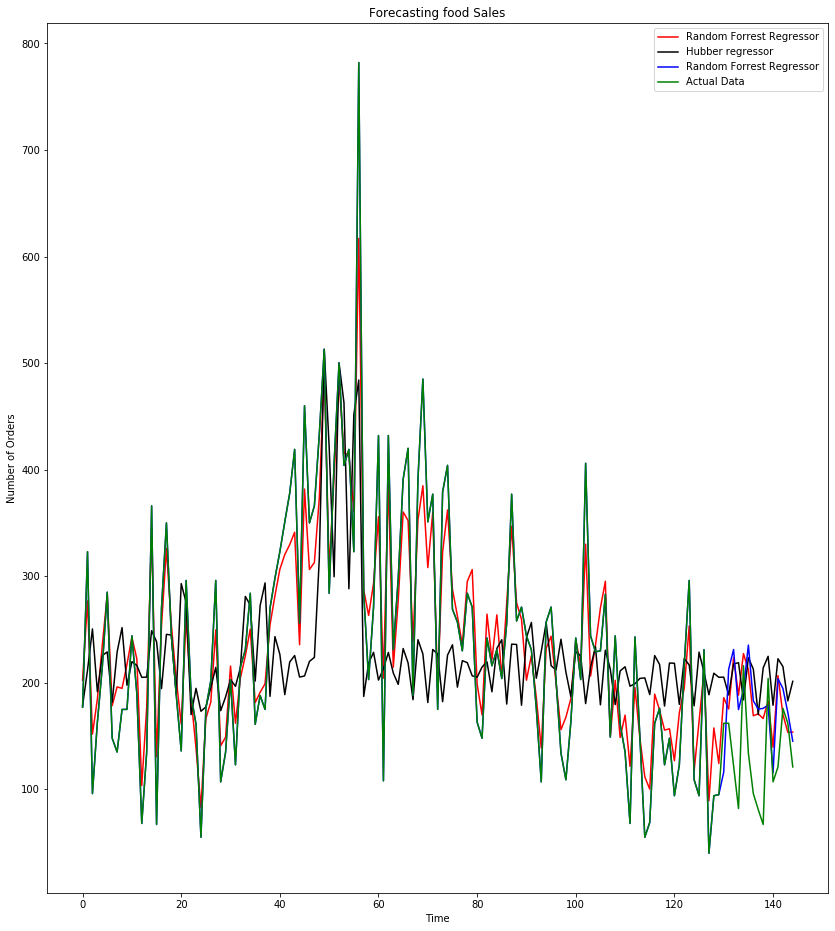

In [19]:
from matplotlib import pyplot
pyplot.figure(figsize=(14, 16))
pyplot.plot(df['y1'], color= 'red', label='Random Forrest Regressor')
pyplot.plot(df['y2'], color= 'black', label='Hubber regressor')
pyplot.plot(df['y3'], color= 'blue', label='Random Forrest Regressor')
pyplot.plot(df['num_orders'], color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from math import sqrt
from matplotlib import pyplot
import tensorflow as tf
import keras.backend as K

Using TensorFlow backend.


In [21]:
input_feature= df.loc[:,'checkout_price':].values
input_data= df.drop(columns=['num_orders','diff']).loc[:,'checkout_price':].values
input_data[0,:]

array([  1.3683    ,   1.5229    ,   0.        ,   0.        ,
         2.        , 208.16867874, 202.51      , 178.40424932,
       177.        ])

In [22]:
lookback= 2

test_size=int(.1 * len(df))
X=[]
y=[]
for i in range(len(df)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_feature[i+ lookback,4])

In [23]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, -1)
X_test = X_test.reshape(X_test.shape[0],lookback, -1)
print(X.shape)
print(X_test.shape)

(142, 2, 9)
(16, 2, 9)


In [25]:
model = Sequential()
model.add(LSTM(units=10, return_sequences= True, input_shape=(X.shape[1],9)))
model.add(LSTM(units=70))
model.add(Dense(units=70, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 2, 10)             800       
_________________________________________________________________
lstm_4 (LSTM)                (None, 70)                22680     
_________________________________________________________________
dense_5 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                710       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 29,281
Trainable params: 29,281
Non-trainable params: 0
__________________________________________________

In [26]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [27]:
model.fit(X, y, epochs=1000)

Epoch 1/1000
142/142 [==============================] - 3s 23ms/step - loss: 66970.6109 - accuracy: 0.0000e+00
Epoch 2/1000
142/142 [==============================] - 0s 410us/step - loss: 66926.9118 - accuracy: 0.0000e+00
Epoch 3/1000
142/142 [==============================] - 0s 421us/step - loss: 66870.0728 - accuracy: 0.0000e+00
Epoch 4/1000
142/142 [==============================] - 0s 385us/step - loss: 66795.1997 - accuracy: 0.0000e+00
Epoch 5/1000
142/142 [==============================] - 0s 376us/step - loss: 66687.2111 - accuracy: 0.0000e+00
Epoch 6/1000
142/142 [==============================] - 0s 357us/step - loss: 66524.3636 - accuracy: 0.0000e+00
Epoch 7/1000
142/142 [==============================] - 0s 309us/step - loss: 66282.1697 - accuracy: 0.0000e+00
Epoch 8/1000
142/142 [==============================] - 0s 250us/step - loss: 65908.1520 - accuracy: 0.0000e+00
Epoch 9/1000
142/142 [==============================] - 0s 240us/step - loss: 65329.1478 - accuracy: 0.00

142/142 [==============================] - 0s 249us/step - loss: 11529.0714 - accuracy: 0.0141
Epoch 75/1000
142/142 [==============================] - 0s 270us/step - loss: 11423.9339 - accuracy: 0.0070
Epoch 76/1000
142/142 [==============================] - 0s 251us/step - loss: 11341.5195 - accuracy: 0.0000e+00
Epoch 77/1000
142/142 [==============================] - 0s 266us/step - loss: 11310.8684 - accuracy: 0.0000e+00
Epoch 78/1000
142/142 [==============================] - 0s 251us/step - loss: 11162.5767 - accuracy: 0.0211
Epoch 79/1000
142/142 [==============================] - 0s 217us/step - loss: 11188.4596 - accuracy: 0.0070
Epoch 80/1000
142/142 [==============================] - 0s 234us/step - loss: 11051.7243 - accuracy: 0.0070
Epoch 81/1000
142/142 [==============================] - 0s 272us/step - loss: 10993.4550 - accuracy: 0.0141
Epoch 82/1000
142/142 [==============================] - 0s 250us/step - loss: 10997.8634 - accuracy: 0.0070
Epoch 83/1000
142/142 [==

142/142 [==============================] - 0s 260us/step - loss: 9507.7350 - accuracy: 0.0000e+00
Epoch 148/1000
142/142 [==============================] - 0s 255us/step - loss: 9540.2810 - accuracy: 0.0211
Epoch 149/1000
142/142 [==============================] - 0s 249us/step - loss: 9492.3516 - accuracy: 0.0211
Epoch 150/1000
142/142 [==============================] - 0s 269us/step - loss: 9528.3684 - accuracy: 0.0211
Epoch 151/1000
142/142 [==============================] - 0s 252us/step - loss: 9565.9292 - accuracy: 0.0070
Epoch 152/1000
142/142 [==============================] - 0s 264us/step - loss: 9652.4577 - accuracy: 0.0141
Epoch 153/1000
142/142 [==============================] - 0s 251us/step - loss: 9493.7318 - accuracy: 0.0070
Epoch 154/1000
142/142 [==============================] - 0s 271us/step - loss: 9459.7376 - accuracy: 0.0000e+00
Epoch 155/1000
142/142 [==============================] - 0s 247us/step - loss: 9423.6193 - accuracy: 0.0000e+00
Epoch 156/1000
142/142

142/142 [==============================] - 0s 193us/step - loss: 8805.7182 - accuracy: 0.0141
Epoch 221/1000
142/142 [==============================] - 0s 182us/step - loss: 8844.2746 - accuracy: 0.0141
Epoch 222/1000
142/142 [==============================] - 0s 181us/step - loss: 8904.0732 - accuracy: 0.0070
Epoch 223/1000
142/142 [==============================] - 0s 280us/step - loss: 8822.8610 - accuracy: 0.0000e+00
Epoch 224/1000
142/142 [==============================] - 0s 225us/step - loss: 8812.2195 - accuracy: 0.0000e+00
Epoch 225/1000
142/142 [==============================] - 0s 263us/step - loss: 8827.6258 - accuracy: 0.0070
Epoch 226/1000
142/142 [==============================] - 0s 207us/step - loss: 8835.9595 - accuracy: 0.0000e+00
Epoch 227/1000
142/142 [==============================] - 0s 202us/step - loss: 8828.9536 - accuracy: 0.0000e+00
Epoch 228/1000
142/142 [==============================] - 0s 164us/step - loss: 8791.7004 - accuracy: 0.0282
Epoch 229/1000
142

142/142 [==============================] - 0s 246us/step - loss: 8702.6749 - accuracy: 0.0070
Epoch 294/1000
142/142 [==============================] - 0s 242us/step - loss: 8520.1934 - accuracy: 0.0000e+00
Epoch 295/1000
142/142 [==============================] - 0s 281us/step - loss: 8454.2348 - accuracy: 0.0141
Epoch 296/1000
142/142 [==============================] - 0s 247us/step - loss: 8542.3541 - accuracy: 0.0000e+00
Epoch 297/1000
142/142 [==============================] - 0s 241us/step - loss: 8459.1162 - accuracy: 0.0000e+00
Epoch 298/1000
142/142 [==============================] - 0s 249us/step - loss: 8461.2586 - accuracy: 0.0000e+00
Epoch 299/1000
142/142 [==============================] - 0s 252us/step - loss: 8466.0808 - accuracy: 0.0070
Epoch 300/1000
142/142 [==============================] - 0s 249us/step - loss: 8460.4874 - accuracy: 0.0070
Epoch 301/1000
142/142 [==============================] - 0s 257us/step - loss: 8451.7627 - accuracy: 0.0000e+00
Epoch 302/1000

142/142 [==============================] - 0s 243us/step - loss: 8407.6875 - accuracy: 0.0141
Epoch 368/1000
142/142 [==============================] - 0s 231us/step - loss: 8394.7197 - accuracy: 0.0141
Epoch 369/1000
142/142 [==============================] - 0s 291us/step - loss: 8391.0111 - accuracy: 0.0352
Epoch 370/1000
142/142 [==============================] - 0s 253us/step - loss: 8350.8575 - accuracy: 0.0211
Epoch 371/1000
142/142 [==============================] - 0s 260us/step - loss: 8430.6201 - accuracy: 0.0000e+00
Epoch 372/1000
142/142 [==============================] - 0s 233us/step - loss: 8417.9910 - accuracy: 0.0070
Epoch 373/1000
142/142 [==============================] - 0s 247us/step - loss: 8410.5101 - accuracy: 0.0000e+00
Epoch 374/1000
142/142 [==============================] - 0s 245us/step - loss: 8385.6165 - accuracy: 0.0141
Epoch 375/1000
142/142 [==============================] - 0s 244us/step - loss: 8406.4664 - accuracy: 0.0000e+00
Epoch 376/1000
142/142

142/142 [==============================] - 0s 163us/step - loss: 8360.1044 - accuracy: 0.0070
Epoch 442/1000
142/142 [==============================] - 0s 182us/step - loss: 8402.7863 - accuracy: 0.0000e+00
Epoch 443/1000
142/142 [==============================] - 0s 172us/step - loss: 8369.3311 - accuracy: 0.0000e+00
Epoch 444/1000
142/142 [==============================] - 0s 185us/step - loss: 8358.4823 - accuracy: 0.0070
Epoch 445/1000
142/142 [==============================] - 0s 185us/step - loss: 8381.1785 - accuracy: 0.0000e+00
Epoch 446/1000
142/142 [==============================] - 0s 230us/step - loss: 8416.0275 - accuracy: 0.0070
Epoch 447/1000
142/142 [==============================] - 0s 275us/step - loss: 8407.1099 - accuracy: 0.0000e+00
Epoch 448/1000
142/142 [==============================] - 0s 310us/step - loss: 8376.3046 - accuracy: 0.0141
Epoch 449/1000
142/142 [==============================] - 0s 277us/step - loss: 8365.7443 - accuracy: 0.0070
Epoch 450/1000
142

142/142 [==============================] - 0s 264us/step - loss: 8327.6960 - accuracy: 0.0000e+00
Epoch 515/1000
142/142 [==============================] - 0s 263us/step - loss: 8313.7490 - accuracy: 0.0070
Epoch 516/1000
142/142 [==============================] - 0s 268us/step - loss: 8560.6828 - accuracy: 0.0141
Epoch 517/1000
142/142 [==============================] - 0s 259us/step - loss: 8390.1043 - accuracy: 0.0070
Epoch 518/1000
142/142 [==============================] - 0s 262us/step - loss: 8432.5962 - accuracy: 0.0070
Epoch 519/1000
142/142 [==============================] - 0s 248us/step - loss: 8428.0132 - accuracy: 0.0141
Epoch 520/1000
142/142 [==============================] - 0s 265us/step - loss: 8319.2140 - accuracy: 0.0282
Epoch 521/1000
142/142 [==============================] - 0s 261us/step - loss: 8499.2084 - accuracy: 0.0141
Epoch 522/1000
142/142 [==============================] - 0s 263us/step - loss: 8583.5157 - accuracy: 0.0070
Epoch 523/1000
142/142 [======

142/142 [==============================] - 0s 203us/step - loss: 8415.1914 - accuracy: 0.0000e+00
Epoch 588/1000
142/142 [==============================] - 0s 176us/step - loss: 8371.2148 - accuracy: 0.0070
Epoch 589/1000
142/142 [==============================] - 0s 203us/step - loss: 8333.4932 - accuracy: 0.0211
Epoch 590/1000
142/142 [==============================] - 0s 274us/step - loss: 8402.2825 - accuracy: 0.0141
Epoch 591/1000
142/142 [==============================] - 0s 314us/step - loss: 8384.7863 - accuracy: 0.0070
Epoch 592/1000
142/142 [==============================] - 0s 234us/step - loss: 8358.9118 - accuracy: 0.0141
Epoch 593/1000
142/142 [==============================] - 0s 201us/step - loss: 8339.4671 - accuracy: 0.0000e+00
Epoch 594/1000
142/142 [==============================] - 0s 202us/step - loss: 8342.3076 - accuracy: 0.0070
Epoch 595/1000
142/142 [==============================] - 0s 190us/step - loss: 8325.1425 - accuracy: 0.0282
Epoch 596/1000
142/142 [==

142/142 [==============================] - 0s 190us/step - loss: 8323.8632 - accuracy: 0.0000e+00
Epoch 662/1000
142/142 [==============================] - 0s 204us/step - loss: 8345.5735 - accuracy: 0.0000e+00
Epoch 663/1000
142/142 [==============================] - 0s 269us/step - loss: 8310.2011 - accuracy: 0.0141
Epoch 664/1000
142/142 [==============================] - 0s 279us/step - loss: 8478.3302 - accuracy: 0.0070
Epoch 665/1000
142/142 [==============================] - 0s 273us/step - loss: 8395.7496 - accuracy: 0.0000e+00
Epoch 666/1000
142/142 [==============================] - 0s 277us/step - loss: 8372.2086 - accuracy: 0.0070
Epoch 667/1000
142/142 [==============================] - 0s 254us/step - loss: 8346.5038 - accuracy: 0.0070
Epoch 668/1000
142/142 [==============================] - 0s 257us/step - loss: 8344.6267 - accuracy: 0.0000e+00
Epoch 669/1000
142/142 [==============================] - 0s 244us/step - loss: 8317.7957 - accuracy: 0.0141
Epoch 670/1000
142

142/142 [==============================] - 0s 164us/step - loss: 8306.7138 - accuracy: 0.0141
Epoch 735/1000
142/142 [==============================] - 0s 181us/step - loss: 8339.8606 - accuracy: 0.0141
Epoch 736/1000
142/142 [==============================] - 0s 181us/step - loss: 8313.4924 - accuracy: 0.0000e+00
Epoch 737/1000
142/142 [==============================] - 0s 168us/step - loss: 8375.2997 - accuracy: 0.0000e+00
Epoch 738/1000
142/142 [==============================] - 0s 181us/step - loss: 8323.4808 - accuracy: 0.0000e+00
Epoch 739/1000
142/142 [==============================] - 0s 176us/step - loss: 8317.0629 - accuracy: 0.0211
Epoch 740/1000
142/142 [==============================] - 0s 193us/step - loss: 8336.3427 - accuracy: 0.0070
Epoch 741/1000
142/142 [==============================] - 0s 190us/step - loss: 8383.2862 - accuracy: 0.0070
Epoch 742/1000
142/142 [==============================] - 0s 173us/step - loss: 8351.8495 - accuracy: 0.0070
Epoch 743/1000
142/142

142/142 [==============================] - 0s 306us/step - loss: 8305.6423 - accuracy: 0.0000e+00
Epoch 809/1000
142/142 [==============================] - 0s 296us/step - loss: 8364.3410 - accuracy: 0.0000e+00
Epoch 810/1000
142/142 [==============================] - 0s 288us/step - loss: 8303.2284 - accuracy: 0.0000e+00
Epoch 811/1000
142/142 [==============================] - 0s 296us/step - loss: 8307.7993 - accuracy: 0.0070
Epoch 812/1000
142/142 [==============================] - 0s 295us/step - loss: 8305.5999 - accuracy: 0.0000e+00
Epoch 813/1000
142/142 [==============================] - 0s 289us/step - loss: 8336.6884 - accuracy: 0.0000e+00
Epoch 814/1000
142/142 [==============================] - 0s 284us/step - loss: 8349.3731 - accuracy: 0.0000e+00
Epoch 815/1000
142/142 [==============================] - 0s 271us/step - loss: 8301.4257 - accuracy: 0.0070
Epoch 816/1000
142/142 [==============================] - 0s 304us/step - loss: 8291.3715 - accuracy: 0.0070
Epoch 817/

142/142 [==============================] - 0s 251us/step - loss: 8311.4990 - accuracy: 0.0070
Epoch 882/1000
142/142 [==============================] - 0s 213us/step - loss: 8309.1748 - accuracy: 0.0000e+00
Epoch 883/1000
142/142 [==============================] - 0s 208us/step - loss: 8285.2445 - accuracy: 0.0070
Epoch 884/1000
142/142 [==============================] - 0s 281us/step - loss: 8372.3683 - accuracy: 0.0000e+00
Epoch 885/1000
142/142 [==============================] - 0s 198us/step - loss: 8297.4748 - accuracy: 0.0282
Epoch 886/1000
142/142 [==============================] - 0s 227us/step - loss: 8323.6394 - accuracy: 0.0211
Epoch 887/1000
142/142 [==============================] - 0s 211us/step - loss: 8315.5386 - accuracy: 0.0000e+00
Epoch 888/1000
142/142 [==============================] - 0s 242us/step - loss: 8304.1206 - accuracy: 0.0000e+00
Epoch 889/1000
142/142 [==============================] - 0s 229us/step - loss: 8345.8275 - accuracy: 0.0000e+00
Epoch 890/1000

142/142 [==============================] - 0s 278us/step - loss: 8281.4974 - accuracy: 0.0141
Epoch 955/1000
142/142 [==============================] - 0s 260us/step - loss: 8279.8895 - accuracy: 0.0000e+00
Epoch 956/1000
142/142 [==============================] - 0s 294us/step - loss: 8335.8331 - accuracy: 0.0000e+00
Epoch 957/1000
142/142 [==============================] - 0s 338us/step - loss: 8296.8162 - accuracy: 0.0000e+00
Epoch 958/1000
142/142 [==============================] - 0s 294us/step - loss: 8349.2280 - accuracy: 0.0070
Epoch 959/1000
142/142 [==============================] - 0s 362us/step - loss: 8305.3113 - accuracy: 0.0000e+00
Epoch 960/1000
142/142 [==============================] - 0s 315us/step - loss: 8301.0114 - accuracy: 0.0141
Epoch 961/1000
142/142 [==============================] - 0s 204us/step - loss: 8285.5746 - accuracy: 0.0423
Epoch 962/1000
142/142 [==============================] - 0s 229us/step - loss: 8270.0308 - accuracy: 0.0000e+00
Epoch 963/1000

In [28]:
predicted_value= model.predict(X)
predicted_value.shape

(142, 1)

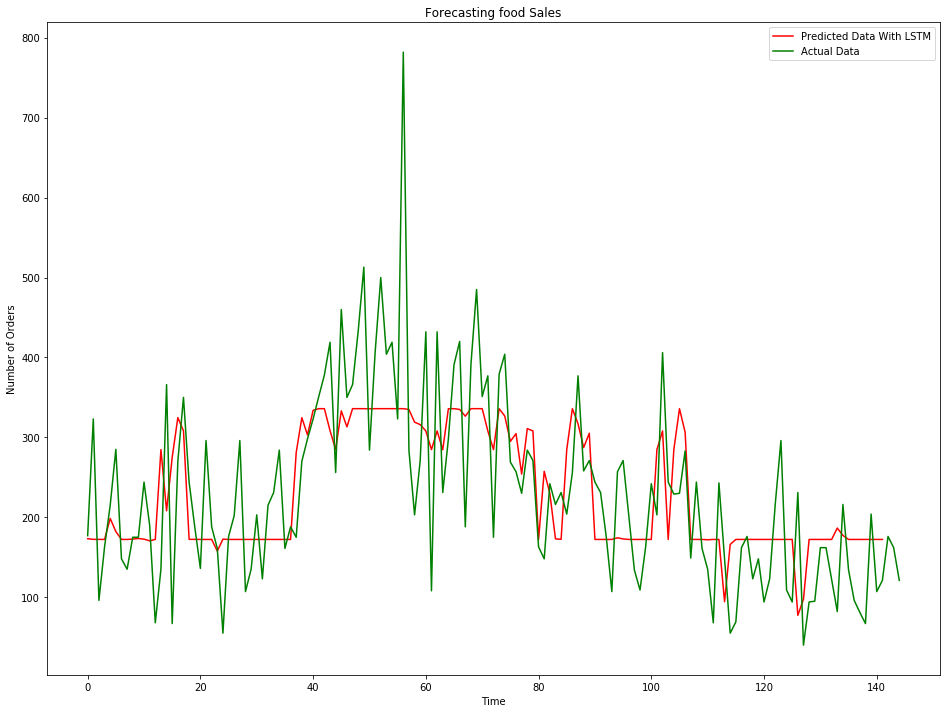

In [42]:
from matplotlib import pyplot
pyplot.figure(figsize=(16, 12))
pyplot.plot(predicted_value, color= 'red', label='Predicted Data With LSTM')
pyplot.plot(df['num_orders'], color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

In [239]:
df.head()


,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,diff,sin,y1,y2,y3
0,136.83,152.29,0,0,177,2.0,15.46,208.168679,197.91,174.738128,177.0
1,135.83,152.29,0,0,323,2.0,16.46,247.768407,278.11,274.922420,323.0
2,132.92,133.92,0,0,96,2.0,1.00,239.293987,142.52,246.610860,96.0
3,135.86,134.86,0,0,163,2.0,-1.00,206.277262,182.03,159.089183,163.0
4,146.50,147.50,0,0,215,2.0,1.00,240.399363,248.56,235.767797,215.0


In [44]:
X= df.drop(columns=['num_orders','y2']).loc[:,'checkout_price':].values
Y= df.num_orders.values

In [45]:
xtrain= X[:130]
ytrain=Y[:130]
xtest=X[131:]
ytest=X[131:]
xtrain.shape

(130, 9)

In [46]:
model = Sequential()
model.add(Dense(units=90, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=9, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=9, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 90)                900       
_________________________________________________________________
dropout_1 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 819       
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 10        
Total params: 1,819
Trainable params: 1,819
Non-trainable params: 0
____________________________________________________

In [47]:
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(), metrics=['accuracy'])

In [48]:
model.fit(xtrain, ytrain, epochs=500)

Epoch 1/500
130/130 [==============================] - 1s 5ms/step - loss: 227.1103 - accuracy: 0.0000e+00
Epoch 2/500
130/130 [==============================] - 0s 194us/step - loss: 194.5393 - accuracy: 0.0000e+00
Epoch 3/500
130/130 [==============================] - 0s 203us/step - loss: 158.0672 - accuracy: 0.0000e+00
Epoch 4/500
130/130 [==============================] - 0s 192us/step - loss: 123.1055 - accuracy: 0.0000e+00
Epoch 5/500
130/130 [==============================] - 0s 195us/step - loss: 97.0777 - accuracy: 0.0000e+00
Epoch 6/500
130/130 [==============================] - 0s 204us/step - loss: 73.9103 - accuracy: 0.0000e+00
Epoch 7/500
130/130 [==============================] - 0s 192us/step - loss: 63.3961 - accuracy: 0.0000e+00
Epoch 8/500
130/130 [==============================] - 0s 222us/step - loss: 62.5208 - accuracy: 0.0077
Epoch 9/500
130/130 [==============================] - 0s 217us/step - loss: 61.1568 - accuracy: 0.0000e+00
Epoch 10/500
130/130 [========

130/130 [==============================] - 0s 130us/step - loss: 31.0791 - accuracy: 0.0077
Epoch 77/500
130/130 [==============================] - 0s 118us/step - loss: 33.4923 - accuracy: 0.0000e+00
Epoch 78/500
130/130 [==============================] - 0s 96us/step - loss: 29.0726 - accuracy: 0.0077
Epoch 79/500
130/130 [==============================] - 0s 118us/step - loss: 30.7219 - accuracy: 0.0154
Epoch 80/500
130/130 [==============================] - 0s 118us/step - loss: 30.3592 - accuracy: 0.0000e+00
Epoch 81/500
130/130 [==============================] - 0s 141us/step - loss: 34.5397 - accuracy: 0.0154
Epoch 82/500
130/130 [==============================] - 0s 120us/step - loss: 27.2828 - accuracy: 0.0077
Epoch 83/500
130/130 [==============================] - 0s 134us/step - loss: 32.4293 - accuracy: 0.0077
Epoch 84/500
130/130 [==============================] - 0s 130us/step - loss: 25.5633 - accuracy: 0.0154
Epoch 85/500
130/130 [==============================] - 0s 15

130/130 [==============================] - 0s 145us/step - loss: 26.5862 - accuracy: 0.0154
Epoch 154/500
130/130 [==============================] - 0s 164us/step - loss: 23.0910 - accuracy: 0.0154
Epoch 155/500
130/130 [==============================] - 0s 151us/step - loss: 24.7592 - accuracy: 0.0231
Epoch 156/500
130/130 [==============================] - 0s 151us/step - loss: 27.2120 - accuracy: 0.0077
Epoch 157/500
130/130 [==============================] - 0s 157us/step - loss: 32.7961 - accuracy: 0.0154
Epoch 158/500
130/130 [==============================] - ETA: 0s - loss: 27.9367 - accuracy: 0.031 - 0s 144us/step - loss: 23.8548 - accuracy: 0.0154
Epoch 159/500
130/130 [==============================] - 0s 161us/step - loss: 26.2378 - accuracy: 0.0154
Epoch 160/500
130/130 [==============================] - 0s 162us/step - loss: 30.4296 - accuracy: 0.0154
Epoch 161/500
130/130 [==============================] - 0s 153us/step - loss: 28.0020 - accuracy: 0.0154
Epoch 162/500
13

130/130 [==============================] - 0s 140us/step - loss: 23.3748 - accuracy: 0.0231
Epoch 230/500
130/130 [==============================] - 0s 143us/step - loss: 23.9269 - accuracy: 0.0154
Epoch 231/500
130/130 [==============================] - 0s 172us/step - loss: 25.1915 - accuracy: 0.0077
Epoch 232/500
130/130 [==============================] - 0s 138us/step - loss: 20.9167 - accuracy: 0.0385
Epoch 233/500
130/130 [==============================] - 0s 136us/step - loss: 25.1314 - accuracy: 0.0385
Epoch 234/500
130/130 [==============================] - 0s 136us/step - loss: 23.1185 - accuracy: 0.0000e+00
Epoch 235/500
130/130 [==============================] - 0s 173us/step - loss: 22.1587 - accuracy: 0.0154
Epoch 236/500
130/130 [==============================] - 0s 127us/step - loss: 20.3086 - accuracy: 0.0154
Epoch 237/500
130/130 [==============================] - 0s 116us/step - loss: 21.9421 - accuracy: 0.0154
Epoch 238/500
130/130 [==============================] -

130/130 [==============================] - 0s 81us/step - loss: 21.9218 - accuracy: 0.0231
Epoch 307/500
130/130 [==============================] - 0s 90us/step - loss: 20.2590 - accuracy: 0.0154
Epoch 308/500
130/130 [==============================] - 0s 71us/step - loss: 19.5634 - accuracy: 0.0077
Epoch 309/500
130/130 [==============================] - 0s 105us/step - loss: 21.5055 - accuracy: 0.0154
Epoch 310/500
130/130 [==============================] - 0s 95us/step - loss: 20.0142 - accuracy: 0.0385
Epoch 311/500
130/130 [==============================] - 0s 151us/step - loss: 22.4512 - accuracy: 0.0077
Epoch 312/500
130/130 [==============================] - 0s 111us/step - loss: 23.8747 - accuracy: 0.0077
Epoch 313/500
130/130 [==============================] - 0s 131us/step - loss: 22.3223 - accuracy: 0.0077
Epoch 314/500
130/130 [==============================] - 0s 141us/step - loss: 26.0729 - accuracy: 0.0154
Epoch 315/500
130/130 [==============================] - 0s 149u

130/130 [==============================] - 0s 154us/step - loss: 19.9389 - accuracy: 0.0154
Epoch 383/500
130/130 [==============================] - 0s 118us/step - loss: 21.2113 - accuracy: 0.0231
Epoch 384/500
130/130 [==============================] - 0s 149us/step - loss: 15.1578 - accuracy: 0.0462
Epoch 385/500
130/130 [==============================] - 0s 127us/step - loss: 18.4297 - accuracy: 0.0308
Epoch 386/500
130/130 [==============================] - 0s 134us/step - loss: 19.9084 - accuracy: 0.0154
Epoch 387/500
130/130 [==============================] - 0s 139us/step - loss: 22.1614 - accuracy: 0.0000e+00
Epoch 388/500
130/130 [==============================] - 0s 135us/step - loss: 18.2901 - accuracy: 0.0231
Epoch 389/500
130/130 [==============================] - 0s 146us/step - loss: 17.8444 - accuracy: 0.0385
Epoch 390/500
130/130 [==============================] - 0s 142us/step - loss: 25.8489 - accuracy: 0.0615
Epoch 391/500
130/130 [==============================] -

130/130 [==============================] - 0s 146us/step - loss: 20.4186 - accuracy: 0.0077
Epoch 460/500
130/130 [==============================] - 0s 121us/step - loss: 17.1227 - accuracy: 0.0231
Epoch 461/500
130/130 [==============================] - 0s 154us/step - loss: 21.7233 - accuracy: 0.0077
Epoch 462/500
130/130 [==============================] - ETA: 0s - loss: 25.0569 - accuracy: 0.031 - 0s 130us/step - loss: 26.7913 - accuracy: 0.0077
Epoch 463/500
130/130 [==============================] - 0s 128us/step - loss: 18.1981 - accuracy: 0.0231
Epoch 464/500
130/130 [==============================] - 0s 141us/step - loss: 17.0481 - accuracy: 0.0154
Epoch 465/500
130/130 [==============================] - 0s 125us/step - loss: 22.6086 - accuracy: 0.0231
Epoch 466/500
130/130 [==============================] - 0s 129us/step - loss: 18.4992 - accuracy: 0.0231
Epoch 467/500
130/130 [==============================] - 0s 137us/step - loss: 18.8032 - accuracy: 0.0308
Epoch 468/500
13

In [49]:
predicted_value= model.predict(X)
predicted_value.shape

(145, 1)

In [50]:
mean_squared_error(Y, predicted_value)

937.3465404382184

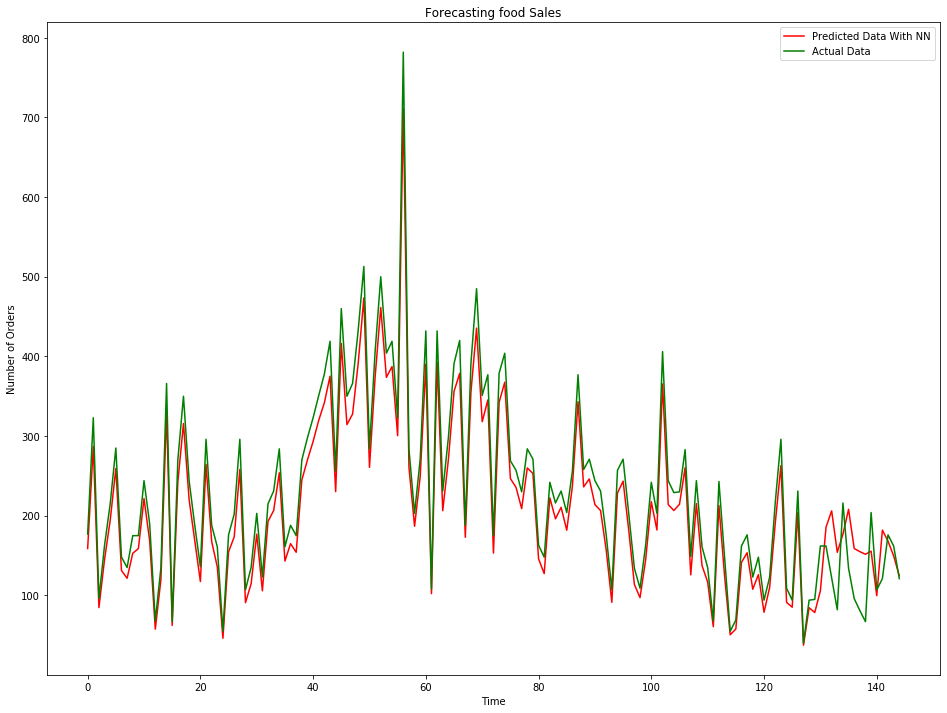

In [65]:
from matplotlib import pyplot
pyplot.figure(figsize=(16, 12))
pyplot.plot(predicted_value, color= 'red', label='Predicted Data With NN')
pyplot.plot(Y, color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

In [52]:
df['ynn']= predicted_value

In [53]:
input_feature= df.loc[:,'checkout_price':].values
input_data= df.drop(columns=['num_orders']).loc[:,'checkout_price':].values
input_data[0,:]

array([  1.3683    ,   1.5229    ,   0.        ,   0.        ,
         2.        ,  15.46      , 208.16867874, 202.51      ,
       178.40424932, 177.        , 158.86302185])

In [54]:
lookback= 10

test_size=int(.1 * len(df))
X=[]
y=[]
for i in range(len(df)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_feature[i+ lookback,4])

In [55]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, -1)
X_test = X_test.reshape(X_test.shape[0],lookback, -1)
print(X.shape)
print(X_test.shape)

(134, 10, 11)
(24, 10, 11)


In [59]:
model1 = Sequential()
model1.add(LSTM(units=10, return_sequences= True, input_shape=(X.shape[1],11)))
model1.add(LSTM(units=10))
model1.add(Dense(units=20, activation='relu'))
model1.add(Dense(units=10, activation='relu'))
model1.add(Dense(units=1))
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 10, 10)            880       
_________________________________________________________________
lstm_8 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_16 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


In [60]:
model1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [61]:
model1.fit(X, y, epochs=1000)

Epoch 1/1000
134/134 [==============================] - 2s 15ms/step - loss: 68984.2425 - accuracy: 0.0000e+00
Epoch 2/1000
134/134 [==============================] - 0s 841us/step - loss: 68943.3979 - accuracy: 0.0000e+00
Epoch 3/1000
134/134 [==============================] - 0s 903us/step - loss: 68907.5413 - accuracy: 0.0000e+00
Epoch 4/1000
134/134 [==============================] - 0s 893us/step - loss: 68868.3791 - accuracy: 0.0000e+00
Epoch 5/1000
134/134 [==============================] - 0s 907us/step - loss: 68822.2207 - accuracy: 0.0000e+00
Epoch 6/1000
134/134 [==============================] - 0s 827us/step - loss: 68766.7337 - accuracy: 0.0000e+00
Epoch 7/1000
134/134 [==============================] - 0s 827us/step - loss: 68699.1634 - accuracy: 0.0000e+00
Epoch 8/1000
134/134 [==============================] - 0s 865us/step - loss: 68612.9497 - accuracy: 0.0000e+00
Epoch 9/1000
134/134 [==============================] - 0s 863us/step - loss: 68505.3012 - accuracy: 0.00

134/134 [==============================] - 0s 770us/step - loss: 19906.5678 - accuracy: 0.0000e+00
Epoch 74/1000
134/134 [==============================] - 0s 817us/step - loss: 19337.8367 - accuracy: 0.0299
Epoch 75/1000
134/134 [==============================] - 0s 772us/step - loss: 18770.7100 - accuracy: 0.0000e+00
Epoch 76/1000
134/134 [==============================] - 0s 738us/step - loss: 18285.7126 - accuracy: 0.0000e+00
Epoch 77/1000
134/134 [==============================] - 0s 786us/step - loss: 17806.5958 - accuracy: 0.0224
Epoch 78/1000
134/134 [==============================] - 0s 793us/step - loss: 17337.3992 - accuracy: 0.0075
Epoch 79/1000
134/134 [==============================] - 0s 750us/step - loss: 17016.6766 - accuracy: 0.0000e+00
Epoch 80/1000
134/134 [==============================] - 0s 751us/step - loss: 16663.3470 - accuracy: 0.0000e+00
Epoch 81/1000
134/134 [==============================] - 0s 713us/step - loss: 16365.9771 - accuracy: 0.0149
Epoch 82/1000

Epoch 146/1000
134/134 [==============================] - 0s 776us/step - loss: 13425.7421 - accuracy: 0.0075
Epoch 147/1000
134/134 [==============================] - 0s 605us/step - loss: 13068.8815 - accuracy: 0.0000e+00
Epoch 148/1000
134/134 [==============================] - 0s 544us/step - loss: 12891.1690 - accuracy: 0.0000e+00
Epoch 149/1000
134/134 [==============================] - 0s 783us/step - loss: 12416.7082 - accuracy: 0.0000e+00
Epoch 150/1000
134/134 [==============================] - 0s 761us/step - loss: 12080.6983 - accuracy: 0.0000e+00
Epoch 151/1000
134/134 [==============================] - 0s 752us/step - loss: 12049.6139 - accuracy: 0.0075
Epoch 152/1000
134/134 [==============================] - 0s 756us/step - loss: 11828.9254 - accuracy: 0.0000e+00
Epoch 153/1000
134/134 [==============================] - 0s 786us/step - loss: 11564.6635 - accuracy: 0.0000e+00
Epoch 154/1000
134/134 [==============================] - 0s 772us/step - loss: 11383.6224 - acc

134/134 [==============================] - 0s 673us/step - loss: 7991.2233 - accuracy: 0.0224
Epoch 220/1000
134/134 [==============================] - 0s 737us/step - loss: 7949.7644 - accuracy: 0.0000e+00
Epoch 221/1000
134/134 [==============================] - 0s 703us/step - loss: 7985.4708 - accuracy: 0.0149
Epoch 222/1000
134/134 [==============================] - 0s 749us/step - loss: 7925.4520 - accuracy: 0.0000e+00
Epoch 223/1000
134/134 [==============================] - 0s 859us/step - loss: 7891.9341 - accuracy: 0.0149
Epoch 224/1000
134/134 [==============================] - 0s 661us/step - loss: 7863.9695 - accuracy: 0.0149
Epoch 225/1000
134/134 [==============================] - 0s 708us/step - loss: 7812.7905 - accuracy: 0.0000e+00
Epoch 226/1000
134/134 [==============================] - 0s 676us/step - loss: 7863.0716 - accuracy: 0.0075
Epoch 227/1000
134/134 [==============================] - 0s 707us/step - loss: 7843.3722 - accuracy: 0.0149
Epoch 228/1000
134/134

134/134 [==============================] - 0s 581us/step - loss: 6906.4968 - accuracy: 0.0149
Epoch 293/1000
134/134 [==============================] - 0s 686us/step - loss: 6987.5468 - accuracy: 0.0000e+00
Epoch 294/1000
134/134 [==============================] - 0s 712us/step - loss: 6745.7626 - accuracy: 0.0075
Epoch 295/1000
134/134 [==============================] - 0s 700us/step - loss: 6883.1989 - accuracy: 0.0000e+00
Epoch 296/1000
134/134 [==============================] - 0s 654us/step - loss: 6813.0973 - accuracy: 0.0075
Epoch 297/1000
134/134 [==============================] - 0s 706us/step - loss: 6793.5897 - accuracy: 0.0075
Epoch 298/1000
134/134 [==============================] - 0s 726us/step - loss: 6876.5662 - accuracy: 0.0075
Epoch 299/1000
134/134 [==============================] - 0s 729us/step - loss: 7266.1272 - accuracy: 0.0000e+00
Epoch 300/1000
134/134 [==============================] - 0s 719us/step - loss: 7135.0557 - accuracy: 0.0000e+00
Epoch 301/1000
134

134/134 [==============================] - 0s 544us/step - loss: 6432.4141 - accuracy: 0.0000e+00
Epoch 367/1000
134/134 [==============================] - 0s 759us/step - loss: 6483.5338 - accuracy: 0.0075
Epoch 368/1000
134/134 [==============================] - 0s 754us/step - loss: 6477.6297 - accuracy: 0.0075
Epoch 369/1000
134/134 [==============================] - 0s 729us/step - loss: 6511.0923 - accuracy: 0.0149
Epoch 370/1000
134/134 [==============================] - 0s 755us/step - loss: 6464.2599 - accuracy: 0.0000e+00
Epoch 371/1000
134/134 [==============================] - 0s 755us/step - loss: 6469.6040 - accuracy: 0.0000e+00
Epoch 372/1000
134/134 [==============================] - 0s 738us/step - loss: 6506.7423 - accuracy: 0.0299
Epoch 373/1000
134/134 [==============================] - 0s 713us/step - loss: 6464.2692 - accuracy: 0.0149
Epoch 374/1000
134/134 [==============================] - 0s 732us/step - loss: 6404.1758 - accuracy: 0.0149
Epoch 375/1000
134/134

134/134 [==============================] - 0s 717us/step - loss: 6585.6106 - accuracy: 0.0000e+00
Epoch 441/1000
134/134 [==============================] - 0s 696us/step - loss: 6387.6802 - accuracy: 0.0000e+00
Epoch 442/1000
134/134 [==============================] - ETA: 0s - loss: 6714.8412 - accuracy: 0.0078 - 0s 713us/step - loss: 6448.6946 - accuracy: 0.0075
Epoch 443/1000
134/134 [==============================] - 0s 722us/step - loss: 6245.1168 - accuracy: 0.0000e+00
Epoch 444/1000
134/134 [==============================] - 0s 688us/step - loss: 6399.3190 - accuracy: 0.0075
Epoch 445/1000
134/134 [==============================] - 0s 701us/step - loss: 6242.8855 - accuracy: 0.0075
Epoch 446/1000
134/134 [==============================] - 0s 717us/step - loss: 6422.6528 - accuracy: 0.0000e+00
Epoch 447/1000
134/134 [==============================] - 0s 710us/step - loss: 6343.5286 - accuracy: 0.0000e+00
Epoch 448/1000
134/134 [==============================] - 0s 715us/step - lo

134/134 [==============================] - 0s 642us/step - loss: 5958.6467 - accuracy: 0.0000e+00
Epoch 514/1000
134/134 [==============================] - 0s 704us/step - loss: 5978.2799 - accuracy: 0.0149
Epoch 515/1000
134/134 [==============================] - 0s 697us/step - loss: 6068.0206 - accuracy: 0.0075
Epoch 516/1000
134/134 [==============================] - 0s 689us/step - loss: 6186.1051 - accuracy: 0.0149
Epoch 517/1000
134/134 [==============================] - 0s 704us/step - loss: 6110.5790 - accuracy: 0.0149
Epoch 518/1000
134/134 [==============================] - 0s 725us/step - loss: 6245.2689 - accuracy: 0.0000e+00
Epoch 519/1000
134/134 [==============================] - 0s 759us/step - loss: 6115.1688 - accuracy: 0.0000e+00
Epoch 520/1000
134/134 [==============================] - 0s 773us/step - loss: 6750.1095 - accuracy: 0.0075
Epoch 521/1000
134/134 [==============================] - 0s 713us/step - loss: 6187.5549 - accuracy: 0.0000e+00
Epoch 522/1000
134

134/134 [==============================] - 0s 670us/step - loss: 5739.5928 - accuracy: 0.0149
Epoch 587/1000
134/134 [==============================] - 0s 570us/step - loss: 5799.6690 - accuracy: 0.0000e+00
Epoch 588/1000
134/134 [==============================] - 0s 745us/step - loss: 5749.8274 - accuracy: 0.0149
Epoch 589/1000
134/134 [==============================] - 0s 731us/step - loss: 5679.3934 - accuracy: 0.0075
Epoch 590/1000
134/134 [==============================] - 0s 611us/step - loss: 5965.2183 - accuracy: 0.0000e+00
Epoch 591/1000
134/134 [==============================] - 0s 726us/step - loss: 5788.0836 - accuracy: 0.0149
Epoch 592/1000
134/134 [==============================] - 0s 729us/step - loss: 5722.5535 - accuracy: 0.0149
Epoch 593/1000
134/134 [==============================] - 0s 763us/step - loss: 6110.1273 - accuracy: 0.0000e+00
Epoch 594/1000
134/134 [==============================] - 0s 739us/step - loss: 5974.3116 - accuracy: 0.0000e+00
Epoch 595/1000
134

134/134 [==============================] - 0s 696us/step - loss: 5937.1852 - accuracy: 0.0000e+00
Epoch 661/1000
134/134 [==============================] - 0s 694us/step - loss: 5633.2388 - accuracy: 0.0075
Epoch 662/1000
134/134 [==============================] - 0s 716us/step - loss: 5714.1052 - accuracy: 0.0000e+00
Epoch 663/1000
134/134 [==============================] - 0s 713us/step - loss: 5459.8723 - accuracy: 0.0075
Epoch 664/1000
134/134 [==============================] - 0s 700us/step - loss: 5269.3099 - accuracy: 0.0000e+00
Epoch 665/1000
134/134 [==============================] - 0s 722us/step - loss: 5248.8807 - accuracy: 0.0149
Epoch 666/1000
134/134 [==============================] - 0s 729us/step - loss: 5253.1077 - accuracy: 0.0075
Epoch 667/1000
134/134 [==============================] - 0s 713us/step - loss: 5283.7339 - accuracy: 0.0000e+00
Epoch 668/1000
134/134 [==============================] - 0s 687us/step - loss: 5233.1039 - accuracy: 0.0075
Epoch 669/1000
134

134/134 [==============================] - 0s 704us/step - loss: 4992.1111 - accuracy: 0.0000e+00
Epoch 734/1000
134/134 [==============================] - 0s 692us/step - loss: 5395.3070 - accuracy: 0.0075
Epoch 735/1000
134/134 [==============================] - 0s 721us/step - loss: 5290.7605 - accuracy: 0.0075
Epoch 736/1000
134/134 [==============================] - 0s 716us/step - loss: 5942.8118 - accuracy: 0.0000e+00
Epoch 737/1000
134/134 [==============================] - 0s 699us/step - loss: 5295.1757 - accuracy: 0.0224
Epoch 738/1000
134/134 [==============================] - 0s 686us/step - loss: 5708.7015 - accuracy: 0.0075
Epoch 739/1000
134/134 [==============================] - 0s 671us/step - loss: 5016.4140 - accuracy: 0.0000e+00
Epoch 740/1000
134/134 [==============================] - 0s 737us/step - loss: 5143.6379 - accuracy: 0.0224
Epoch 741/1000
134/134 [==============================] - 0s 717us/step - loss: 5096.7838 - accuracy: 0.0149
Epoch 742/1000
134/134

134/134 [==============================] - 0s 694us/step - loss: 4957.6505 - accuracy: 0.0149
Epoch 808/1000
134/134 [==============================] - 0s 698us/step - loss: 5152.3996 - accuracy: 0.0000e+00
Epoch 809/1000
134/134 [==============================] - 0s 721us/step - loss: 4976.8420 - accuracy: 0.0149
Epoch 810/1000
134/134 [==============================] - 0s 754us/step - loss: 4935.6558 - accuracy: 0.0000e+00
Epoch 811/1000
134/134 [==============================] - 0s 733us/step - loss: 5032.5870 - accuracy: 0.0075
Epoch 812/1000
134/134 [==============================] - 0s 803us/step - loss: 4635.3636 - accuracy: 0.0149
Epoch 813/1000
134/134 [==============================] - 0s 485us/step - loss: 4950.5393 - accuracy: 0.0149
Epoch 814/1000
134/134 [==============================] - 0s 467us/step - loss: 4867.6022 - accuracy: 0.0075
Epoch 815/1000
134/134 [==============================] - 0s 697us/step - loss: 6087.6322 - accuracy: 0.0149
Epoch 816/1000
134/134 [==

134/134 [==============================] - 0s 787us/step - loss: 4628.8851 - accuracy: 0.0075
Epoch 881/1000
134/134 [==============================] - 0s 642us/step - loss: 4697.4367 - accuracy: 0.0299
Epoch 882/1000
134/134 [==============================] - 0s 695us/step - loss: 4600.3625 - accuracy: 0.0000e+00
Epoch 883/1000
134/134 [==============================] - 0s 546us/step - loss: 4605.0590 - accuracy: 0.0075
Epoch 884/1000
134/134 [==============================] - 0s 728us/step - loss: 4563.5147 - accuracy: 0.0149
Epoch 885/1000
134/134 [==============================] - 0s 699us/step - loss: 4692.9330 - accuracy: 0.0075
Epoch 886/1000
134/134 [==============================] - 0s 748us/step - loss: 4688.0212 - accuracy: 0.0149
Epoch 887/1000
134/134 [==============================] - 0s 715us/step - loss: 4678.2620 - accuracy: 0.0149
Epoch 888/1000
134/134 [==============================] - 0s 698us/step - loss: 4900.5895 - accuracy: 0.0075
Epoch 889/1000
134/134 [======

134/134 [==============================] - 0s 700us/step - loss: 5728.5391 - accuracy: 0.0149
Epoch 955/1000
134/134 [==============================] - 0s 694us/step - loss: 5725.4199 - accuracy: 0.0000e+00
Epoch 956/1000
134/134 [==============================] - 0s 713us/step - loss: 6035.1711 - accuracy: 0.0149
Epoch 957/1000
134/134 [==============================] - 0s 723us/step - loss: 5822.7844 - accuracy: 0.0224
Epoch 958/1000
134/134 [==============================] - 0s 741us/step - loss: 5748.7319 - accuracy: 0.0075
Epoch 959/1000
134/134 [==============================] - 0s 723us/step - loss: 5443.4581 - accuracy: 0.0000e+00
Epoch 960/1000
134/134 [==============================] - 0s 722us/step - loss: 5217.7050 - accuracy: 0.0000e+00
Epoch 961/1000
134/134 [==============================] - 0s 662us/step - loss: 5091.4133 - accuracy: 0.0000e+00
Epoch 962/1000
134/134 [==============================] - 0s 707us/step - loss: 4730.3270 - accuracy: 0.0373
Epoch 963/1000
134

In [62]:
predicted_val= model1.predict(X)
predicted_val.shape

(134, 1)

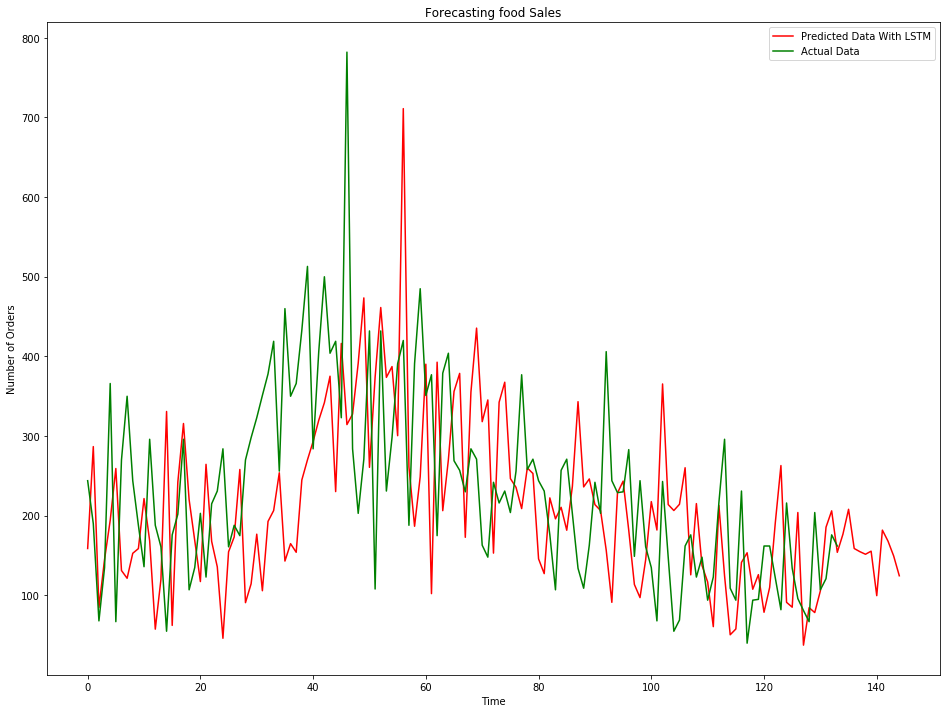

In [64]:
from matplotlib import pyplot
pyplot.figure(figsize=(16, 12))
pyplot.plot(predicted_value, color= 'red', label='Predicted Data With LSTM')
pyplot.plot(y,color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()